# DATA analysis

## used promoters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
promoters_df = pd.read_csv('../data/raw/promoters.csv')
promoters_df


,no_by_pos,position,name,number,sequence_5_to_3,no_name,id,sys_name,length,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,1,1,pCYC1,1,NaN,1_pCYC1,1_pCYC1_1,YJR048W,NaN,2775.830,3742.74000,2459.6600
1,2,1,pENO2,2,NaN,2_pENO2,2_pENO2_2,YHR174W,NaN,2950.220,2527.27000,84.3614
2,3,1,pPCK1,3,NaN,3_pPCK1,3_pPCK1_3,YKR097W,NaN,1948.900,9.80902,4639.4100
3,4,1,pRPL15B,4,NaN,4_pRPL15B,4_pRPL15B_4,YMR121C,NaN,200.212,186.50900,258.0280
4,1,2,pCCW12,5,NaN,5_pCCW12,5_pCCW12_1,YLR110C,NaN,5496.460,6376.54000,2516.0500
5,2,2,pMLS1,6,NaN,6_pMLS1,6_pMLS1_2,YNL117W,NaN,2222.160,8.09464,5267.0000
6,3,2,pTPI1,7,NaN,7_pTPI1,7_pTPI1_3,YDR050C,NaN,2264.780,2853.86000,209.1640
7,4,2,pURE2,8,NaN,8_pURE2,8_pURE2_4,YNL229C,NaN,253.590,344.07600,222.4390


In [3]:
promoters_df = promoters_df[["name", "NIL_6h_FPKM", "NIL_12h_FPKM", "NIL_24h_FPKM"]]
promoters_df

,name,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [4]:
promoters_df.columns = ['name', 6, 12, 24]
promoters_df

,name,6,12,24
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [5]:
promoters_df = promoters_df.set_index('name')


In [6]:
df_with_prom1 = promoters_df.loc[["pCYC1","pENO2","pPCK1","pRPL15B"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


In [7]:
df_with_prom2 = promoters_df.loc[["pCCW12","pMLS1","pTPI1","pURE2"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


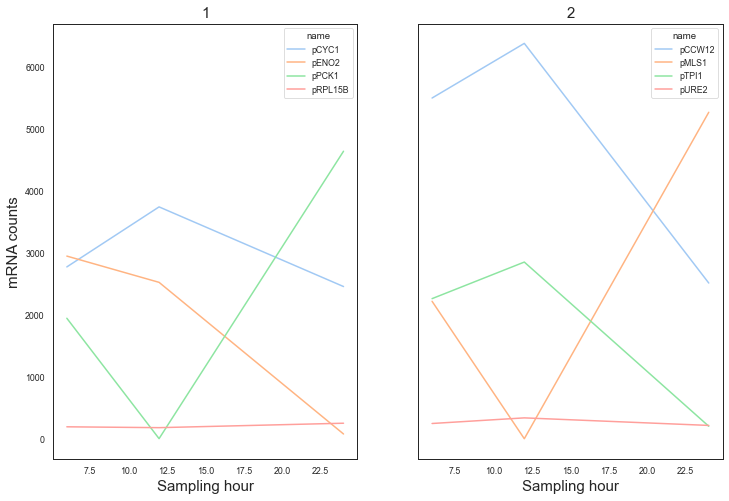

In [8]:
# Plotting an empty subplot

import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()
sns.set_style("white")
sns.set_palette("pastel")
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.5})

# adding the data to the fig
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8), sharey=True)  # 1 row, 2 columns 

# Adding the DFs
ax1 = df_with_prom1.plot( ax=ax1)
ax2 = df_with_prom2.plot( ax=ax2)

# Adding all the titles
ax1.set_title("1",  fontsize=15)
ax2.set_title("2",  fontsize=15)
ax1.set_ylabel("mRNA counts",  fontsize=15)
ax1.set_xlabel("Sampling hour", fontsize=15)
ax2.set_ylabel("mRNA counts",  fontsize=15)
ax2.set_xlabel("Sampling hour", fontsize=15)
ax1.get_shared_x_axes().join(ax1, ax2)
#plt.savefig('Pictures/Dynamics_of_chosen_promoters.png', dpi = 120)

## DATA wrangling

In [9]:
#1. In Emacs; Result_table_210330_tmet494_Soren.xlsx to .csv N.D. -> N.A.; N.A. -> NA.
#2. Change names to plates names e.g.Result_table_210330_tmet494_Soren.csv -> Result_table_210330_tmet494_yp48Feed-Nofeed.xlsx


In [10]:
#your_df = pd.read_csv('../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren.csv',sep=';',decimal=',')
#your_df.to_csv('../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv')

In [11]:
import pandas as pd
import glob
import os

results1 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv", sep = ',')
#results2 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
#results_merged = pd.concat([results1, results2], ignore_index=True)
results_merged = results1
results_merged

,Unnamed: 0,data_file,sample_notes,AC Samples,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tetrahydroalstonine,Amt_ug_L_Tryptamine,Amt_ug_L_Tryptophan,Unnamed: 10,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,Amt_uM_Tryptophan
0,0,210330_TMET494_032.xms,96WP988_P1_B2,0_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,8009.517,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,49.99074398,N.A.
1,1,210330_TMET494_033.xms,96WP988_P1_B3,0_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,5817.125,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,36.30710898,N.A.
2,2,210330_TMET494_034.xms,96WP988_P1_B4,0_3_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6003.777,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,37.47208214,N.A.
3,3,210330_TMET494_035.xms,96WP988_P1_B5,1_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6635.864,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,41.41720135,N.A.
4,4,210330_TMET494_036.xms,96WP988_P1_B6,1_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,7046.096,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,43.97763076,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,210330_TMET494_237.xms,96WP989_P2_F11,17_2_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,79827.258,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,498.235289,N.A.
104,104,210330_TMET494_241.xms,96WP989_P2_G2,17_3_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,97553.734,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,608.8736363,N.A.
105,105,210330_TMET494_246.xms,96WP989_P2_G7,15_4_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,623.513,N.D.,113480.148,N.A.,NaN,N.D.,N.D.,N.D.,1.175175754,N.D.,708.2770441,N.A.
106,106,210330_TMET494_247.xms,96WP989_P2_G8,15_5_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,576.808,N.D.,122431.367,N.A.,NaN,N.D.,N.D.,N.D.,1.087147784,N.D.,764.1453439,N.A.


In [12]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results_merged.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)


# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 3:11], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 0:1], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 2:3], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, -1:], inplace = True, axis = 1)

# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

In [13]:
# seperate sample notes into different plates ie. P1, P2, P3: A1, A2... 
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'plate', 'well']
df_filter_plates.iloc[108:, 2:3] = df_filter_plates.iloc[108:, 1:2]
df_filter_plates.iloc[108:, 1:2] = 'P3'

list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

In [14]:
#df_filter[['sample', 'plate', 'well']] = pd.DataFrame([df_filter_plates['sample'], df_filter_plates['plate'], df_filter_plates['well'] ])
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2
concatenated = concatenated.fillna(0.0)

#### adding media rows to the AC_sample column

In [15]:

for index, row in concatenated.iterrows():
    if row['plate'] == 'P1':
        concatenated.iloc[index, 9:10] = 'yp48' 
        
    if row['plate'] == 'P2':
        concatenated.iloc[index, 9:10] = 'yp49' 
        
    if row['plate'] == 'P3':
        concatenated.iloc[index, 9:10] = 'yp50'
    
    if row['plate'] == 'P4':
        concatenated.iloc[index, 9:10] = 'yp51'
    if row['plate'] == 'P5':
        concatenated.iloc[index, 9:10] = 'yp52'
                
    
    # Addding zero betwieen letter and well value. 
    if len(row['well']) == 2:
        listed = list(row['well'])
        with_0 = str(listed[0])+str(0)+ str(listed[1])
        concatenated.iloc[index, 10:11] = with_0
         
Processed_file = concatenated.fillna(0)
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


## Merge Plate design yp48-52 metadata into single csv file


In [16]:
# importing xls file
xls = pd.ExcelFile('../data/raw/023_LC-MS/excel_files/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls')

# reading the different sheets
df1 = pd.read_excel(xls, 'MIA-HA-1-17_yp48')  # plate 48
df1["plate"] = 'yp48' 

df2 = pd.read_excel(xls, 'MIA-HA-51-80_yp49') # plate 49
df2["plate"] = 'yp49' 

df3 = pd.read_excel(xls, 'MIA-HA-21-50_yp50') # plate 50
df3["plate"] = 'yp50' 

df4 = pd.read_excel(xls, 'MIA-HA-81-100_yp51')# plate 51
df4["plate"] = 'yp51' 

df5 = pd.read_excel(xls, 'yp52-HA-71-72')     # plate 52
df5["plate"] = 'yp52' 


In [17]:
results_merged = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [18]:
results_merged

,position,Sample name,Cellular Compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,genotype,plate,Cellular compartment
0,A01,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
1,A02,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
2,A03,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
3,A04,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
4,A05,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
572,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
573,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
574,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN


In [19]:
results_merged.to_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv', header = True, index = False)

In [20]:
# read into a dataframe
PlateDesign = pd.read_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv') 

In [21]:
# we take the columns that we are interested in
PlateDesign= PlateDesign[['plate','position','Strain', 'Replicate #', 'genotype', 'Medium']]
# rename them
PlateDesign.columns = ['plate', 'well', 'strain','col_no', 'genotype', 'medium']
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


In [22]:
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


In [23]:
# Merge our lcms file with the genotype/strain 
merged_inner = pd.merge(Processed_file, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
merged_inner

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD
1,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD
3,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04,MIA-HA-2,3.0,pCYC1_pURE2,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11,MIA-HA-74,2.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
158,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02,MIA-HA-75,2.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
159,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07,MIA-HA-77,1.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
160,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08,MIA-HA-77,2.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


It seems like we have some duplicates. We can easily get rid of them in the following way:

In [24]:
final_processed_data = merged_inner.drop_duplicates(ignore_index = True, subset=['data_file'])

## YP48 (Cro strains)

\*\*\* Experiment 1. Check if MIA-HA-2 - 17 strains produces MIA's with / without feeding. We suspect that the base strain MIA-HA-1 has lost GES and or TDC (outside strictosidine module). If this is the case our strains will only produce MIA when feed

Strains\
1. YP48

Media feed: 0.2 mM geraniol & 1 mM tryptamine 1. YP + 2 % glucose 2. YP + 2 % glucose + feed

Cultivation 30C, 300 rpm 1. (Wednesday 24): Inoculate precultures. Transfer 10 of YP48 g.stock to 90 media 1 (-feed). 2. (Friday 26): Inoculate maincultures. Transfer 10 of preculture to 500 media 1 and media 2 3. (Monday 8): For each media, one at a time: 1. Transfer 10 of mainculture into 140 to measure OD (in incubator while measuring) 2. Transfer 200 into new 96 well plate, 3. Add 20 uL 10 mg/L caffeine stock 4. Add X ul Std_MM_v13 standards 5. Transfer 220 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C) 6. Measure MIAs (extracellular loganin) 4. (TBD): Khem run plate 5. (TBD): Data analysis

\*\*\*\* Analytics notes: Notes from Khem: N:D.: not detected or below quantification limits; N.A.: not analyzed; Loganin, strictosidine and tryptamine are quantifiable and others are not quantifiable. Some samples might have been not integrated because of low abundance of the peak


In [25]:
# we have to make all the values into floats in order to sort them later
final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2593/2972764381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


In [26]:
sorted_df = final_processed_data.sort_values(by='Amt_uM_Strictosidine', ascending=False)
yp48 = sorted_df.loc[sorted_df['plate'] == 'yp48']
yp48

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
40,210330_TMET494_097.xms,96WP988_P1_F2,0.0,0.0,0.0,0.0,0.0,52.05727749,96WP988,yp48,F02,MIA-HA-15,2.0,pRPL15B_pTPI1,YPD
14,210330_TMET494_049.xms,96WP988_P1_C6,0.0,0.0,0.0,0.0,0.0,48.16994133,96WP988,yp48,C06,MIA-HA-6,3.0,pENO2_pURE2,YPD
15,210330_TMET494_050.xms,96WP988_P1_C7,0.0,0.0,0.0,0.0,0.0,49.85464362,96WP988,yp48,C07,MIA-HA-7,1.0,pENO2_pTPI1,YPD
16,210330_TMET494_051.xms,96WP988_P1_C8,0.0,0.0,0.0,0.0,0.0,43.8310885,96WP988,yp48,C08,MIA-HA-7,2.0,pENO2_pTPI1,YPD
12,210330_TMET494_047.xms,96WP988_P1_C4,0.0,0.0,0.0,0.0,0.0,41.23962676,96WP988,yp48,C04,MIA-HA-6,1.0,pENO2_pURE2,YPD
17,210330_TMET494_052.xms,96WP988_P1_C9,0.0,0.0,0.0,0.0,0.0,50.07091499,96WP988,yp48,C09,MIA-HA-7,3.0,pENO2_pTPI1,YPD
18,210330_TMET494_053.xms,96WP988_P1_C10,0.0,0.0,0.0,0.0,0.0,42.64971914,96WP988,yp48,C10,MIA-HA-8,1.0,pENO2_pMLS1,YPD
13,210330_TMET494_048.xms,96WP988_P1_C5,0.0,0.0,0.0,0.0,0.0,45.56039196,96WP988,yp48,C05,MIA-HA-6,2.0,pENO2_pURE2,YPD
11,210330_TMET494_046.xms,96WP988_P1_C3,0.0,0.0,0.0,0.0,0.0,43.78639371,96WP988,yp48,C03,MIA-HA-5,3.0,pCYC1_pCCW12,YPD
41,210330_TMET494_098.xms,96WP988_P1_F3,0.0,0.0,0.0,0.0,0.0,48.61691424,96WP988,yp48,F03,MIA-HA-15,3.0,pRPL15B_pTPI1,YPD


In [27]:
yp49 = sorted_df.loc[sorted_df['plate'] == 'yp49']
yp49

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
69,210330_TMET494_181.xms,96WP989_P2_C7,0.0,4.126650955,0.0,26.206121,0.0,516.8216952,96WP989,yp49,C07,MIA-HA-61,1.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
70,210330_TMET494_182.xms,96WP989_P2_C8,0.0,3.72660997,0.0,22.001720,0.0,663.9293846,96WP989,yp49,C08,MIA-HA-61,2.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
77,210330_TMET494_192.xms,96WP989_P2_D5,0.0,3.676697064,0.0,21.646608,0.0,544.414761,96WP989,yp49,D05,MIA-HA-64,2.0,OpumG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
71,210330_TMET494_183.xms,96WP989_P2_C9,0.0,3.294851171,0.0,21.050240,0.0,342.8212957,96WP989,yp49,C09,MIA-HA-61,3.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
75,210330_TMET494_190.xms,96WP989_P2_D3,0.0,2.52681746,0.0,18.588539,0.0,520.9128948,96WP989,yp49,D03,MIA-HA-63,3.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
66,210330_TMET494_178.xms,96WP989_P2_C4,0.0,7.108924638,0.0,16.394306,0.0,639.5909749,96WP989,yp49,C04,MIA-HA-60,1.0,CacuG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
76,210330_TMET494_191.xms,96WP989_P2_D4,0.0,1.222695835,0.0,12.401410,0.0,541.1175821,96WP989,yp49,D04,MIA-HA-64,1.0,OpumG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
64,210330_TMET494_176.xms,96WP989_P2_C2,0.0,1.34700292,0.0,12.329351,0.0,543.1591125,96WP989,yp49,C02,MIA-HA-59,2.0,CacuG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
67,210330_TMET494_179.xms,96WP989_P2_C5,0.0,4.516988575,0.0,11.918757,0.0,562.2379603,96WP989,yp49,C05,MIA-HA-60,2.0,CacuG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
68,210330_TMET494_180.xms,96WP989_P2_C6,0.0,2.483085711,0.0,10.063805,0.0,513.9511796,96WP989,yp49,C06,MIA-HA-60,3.0,CacuG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


## Conclusion 
1. Bg strain mutated & lost genes 
2. Promoters course large variation - continously low (pRPL15b) doesn't work well for G8H but does for alright for CPR (pURE) 
3. Has strain lost tryptamine synthase or geraniol synthesis genes?


Now doing the same with the other data 

## YP49-51 (library strains)

\*\*\* Experiment:

-   Strains: 3 colonies from each of 80 library plates. Each plate has specific combination of G8H and CPR but any of 16 possible promoter combinations
-   Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
-   Sampling: day 6

\*\*\*\* Analytics notes:

-   More than 500 uM tryptamine in all samples
-   No Loganic acid or Secologanin detected in any sample

**Wells not injected/acquired:**

-   Khem is not sure why.
    -   Volume is high enough.
    -   No bubbles as samples where filtered before handover (as well as spun down by Khem)
    -   Column clogging due to YPD?

Run 1

-   YP49
    -   A3, B1

Run 2

-   YP50
    -   :A9 A10, B3, B5, B9, C2, C4, C5, C9, D6
-   YP51
    -   :A3, A4, A9, A11, B7, B9, B10, C9, D3, E4

Run 3:

Rerun of samples not injected in run 2 as well as control(H7-11) for both plates rerun

-   YP50
    -   C5 and H7-11
-   YP51
    -   A11 and B9

## YP49-51 (library strains)

\*\*\* Experiment:

-   Strains: 3 colonies from each of 80 library plates. Each plate has specific combination of G8H and CPR but any of 16 possible promoter combinations
-   Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
-   Sampling: day 6

\*\*\*\* Analytics notes:

-   More than 500 uM tryptamine in all samples
-   No Loganic acid or Secologanin detected in any sample

**Wells not injected/acquired:**

-   Khem is not sure why.
    -   Volume is high enough.
    -   No bubbles as samples where filtered before handover (as well as spun down by Khem)
    -   Column clogging due to YPD?

Run 1

-   YP49
    -   A3, B1

Run 2

-   YP50
    -   :A9 A10, B3, B5, B9, C2, C4, C5, C9, D6
-   YP51
    -   :A3, A4, A9, A11, B7, B9, B10, C9, D3, E4

Run 3:

Rerun of samples not injected in run 2 as well as control(H7-11) for both plates rerun

-   YP50
    -   C5 and H7-11
-   YP51
    -   A11 and B9

In [40]:
# This is plate yp49
plate49 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
plate50 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210603_tmet525_yp50.csv", sep = ',')
plate51 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210603_tmet525_yp50.csv", sep = ',')

# Stack the DataFrames on top of each other
results2 = pd.concat([plate49, plate50,plate51 ], axis=0)
results2

,data_file,sample_notes,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tryptamine,Unnamed: 7,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine
0,210519_TMET517_018.xms,96WP1056_A01,NaN,NaN,NaN,143.890,146892.391,NaN,NaN,NaN,NaN,0.271199,916.816821
1,210519_TMET517_019.xms,96WP1056_A02,NaN,NaN,NaN,39.852,160741.781,NaN,NaN,NaN,NaN,0.075112,1003.256653
2,210519_TMET517_020.xms,96WP1056_A03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210519_TMET517_021.xms,96WP1056_A04,NaN,NaN,NaN,29.985,135912.563,NaN,NaN,NaN,NaN,0.056515,848.287124
4,210519_TMET517_022.xms,96WP1056_A05,NaN,NaN,NaN,NaN,127009.570,NaN,NaN,NaN,NaN,NaN,792.719823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,210603_TMET525_129.xms,96WPYP50_H8,NaN,NaN,NaN,15524.436,127146.813,NaN,NaN,NaN,NaN,29.259920,793.576414
92,210603_TMET525_130.xms,96WPYP50_H9,NaN,1195.809,NaN,18326.477,200282.125,NaN,NaN,3.063192,NaN,34.541111,1250.044470
93,210603_TMET525_131.xms,96WPYP50_H10,NaN,1284.234,NaN,18159.336,200116.313,NaN,NaN,3.289702,NaN,34.226089,1249.009568
94,210603_TMET525_132.xms,96WPYP50_H11,NaN,7965.149,NaN,37619.777,193009.719,NaN,NaN,20.403579,NaN,70.904456,1204.654344


In [48]:

# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results2.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)

# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 2:8], inplace = True, axis = 1)
df_filter
# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

# split the sample notes column
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
print(df_filter_plates)
df_filter_plates.columns = ['sample', 'well']
list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

# Add the to dataframes together
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2

# FIX THIS
concatenated.insert(loc=8, column='plate', value = 'yp49')

#df_filter_plates 
concatenated = concatenated.fillna(0)

           0    1
0   96WP1056  A01
1   96WP1056  A02
3   96WP1056  A04
4   96WP1056  A05
5   96WP1056  A06
..       ...  ...
91  96WPYP50   H8
92  96WPYP50   H9
93  96WPYP50  H10
94  96WPYP50  H11
95  96WPYP50  H12

[266 rows x 2 columns]


In [47]:
# Merge our lcms file with the genotype/strain 
merged_inner1 = pd.merge(concatenated, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
merged_inner1

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,yp49,A01,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,yp49,A02,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,96WP1056,yp49,A04,MIA-HA-52,1.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
3,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,96WP1056,yp49,A05,MIA-HA-52,2.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,96WP1056,yp49,A06,MIA-HA-52,3.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904456,1204.654344,96WPYP50,yp49,H11,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
136,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904456,1204.654344,96WPYP50,yp49,H11,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
137,210519_TMET517_133.xms,96WP1056_H12,0.0,0.000000,0.0,0.000000,910.511228,96WP1056,yp49,H12,NaN,1.0,NaN,YPD + 1 mM tryptamine + 0.2 mM geraniol
138,210603_TMET525_133.xms,96WPYP50_H12,0.0,0.000000,0.0,0.000000,1072.379871,96WPYP50,yp49,H12,NaN,1.0,NaN,YPD + 1 mM tryptamine + 0.2 mM geraniol


In [38]:
pd.set_option('max_rows', 40)

In [43]:
# we have to make all the values into floats in order to sort them 
merged_inner1['Amt_uM_Strictosidine'] = pd.to_numeric(merged_inner1['Amt_uM_Strictosidine'], downcast='float')
sorted_df = merged_inner1.sort_values(by='Amt_uM_Strictosidine', ascending=False)
sorted_df

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
135,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904457,1204.654344,96WPYP50,yp49,H11,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
136,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904457,1204.654344,96WPYP50,yp49,H11,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
134,210519_TMET517_132.xms,96WP1056_H11,0.0,13.840299,0.0,41.660255,623.483435,96WP1056,yp49,H11,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
89,210519_TMET517_099.xms,96WP1056_F04,0.0,3.810549,0.0,38.738052,620.003695,96WP1056,yp49,F04,MIA-HA-72,1.0,CroG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
97,210603_TMET525_105.xms,96WPYP50_F10,0.0,4.212129,0.0,34.938194,983.416846,96WPYP50,yp49,F10,MIA-HA-74,1.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,210603_TMET525_066.xms,96WPYP50_D10,0.0,0.000000,0.0,0.000000,1700.038422,96WPYP50,yp49,D10,MIA-HA-66,1.0,OpumG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
60,210603_TMET525_066.xms,96WPYP50_D10,0.0,0.000000,0.0,0.000000,1700.038422,96WPYP50,yp49,D10,MIA-HA-66,1.0,OpumG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
53,210519_TMET517_060.xms,96WP1056_D04,0.0,0.000000,0.0,0.000000,872.774641,96WP1056,yp49,D04,MIA-HA-64,1.0,OpumG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
52,210519_TMET517_059.xms,96WP1056_D03,0.0,0.000000,0.0,0.000000,985.210667,96WP1056,yp49,D03,MIA-HA-63,3.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
